<h1>House Prices - Advanced Regression Techniques</h1>

<p>
    In this project we will carry out the forecast of housing sales prices
</p>

<h2> 1 - Starting </h2>
<ul>
    <li>It is a best practice perform the correlation earlier in the project</li>
    <li>Let's use multiple plots for better undertanding of the data</li>
    <li>Let's try to find the best prediction value</li>
</ul>

In [476]:
#importing libraries

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for data algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import  Ridge
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

<h2>Acquiring the data</h2>

In [477]:
train_df = pd.read_csv(r'C:\Users\rafae\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\rafae\Downloads\train.csv')

In [478]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [479]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<p>
    There are a huge number of columns in this dataset, let's dig deeper to try to uncover some correlations right away
</p>

<p>
    Let's understand some of the columns and identify the knowledge earlier
</p>
<p>Since we have a number of columns, I will focus on identifying only our target variable and all the others will be predictive</p>
<p><b>Target: SalePrice</b></p>


In [480]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's arrange our columns so that our target variable is highlighted, we are going to do the same for our test dataframe

In [481]:
train_df = train_df[['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                     'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                     'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                     'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                     'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                     'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
                     'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                     'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
                     'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
                     'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                     'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                     'SaleCondition', 'Id']]

train_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Id
0,208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,181500,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2
2,223500,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,3
3,140000,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,4
4,250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,5


In [482]:
train_df.describe()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,730.500000
std,79442.502883,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,421.610009
min,34900.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000
25%,129975.000000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,365.750000
50%,163000.000000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,730.500000
75%,214000.000000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1095.250000
max,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1460.000000


<p>
    The average sales value of the properties is $180,921.19
</p>
<p>
    The properties were built on average during the 1970s
</p>
<p>
    43% of the properties contais Basement with full bathrooms
</p>
<p>
    38% of the propertites contais Half baths above grade
</p>
<p>
    61% of the properties contais fireplaces
</p>
<p>
    Some of the columns I commented on may or may not interfere with the sale price of the property, in addition to other factors such as area of the residence, space for cars, etc.
</p>

In [483]:
train_df.describe(include="O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [484]:
train_df[['SalePrice', 'Fireplaces']].groupby('Fireplaces', as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


In [485]:
train_df[['SalePrice','BsmtFullBath']].groupby('BsmtFullBath', as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,BsmtFullBath,SalePrice
2,2,213063.066667
1,1,202522.918367
3,3,179000.000000
0,0,165521.640187


In [486]:
train_df[['SalePrice','Utilities']].groupby('Utilities', as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Utilities,SalePrice
0,AllPub,180950.95682
1,NoSeWa,137500.00000


<p>
    It seems that the more fireplaces I have in the property, the more expensive it gets
</p>
<p>
    Now interesting that the amount of bathrooms in the basement does not interfere with the price, perhaps we will not consider it in the model
</p>
<p>
    The utilities interfere in the price
</p>

  The target variable has an asymmetric distribution. When performing regression, it sometimes makes sense to perform a transformation of this variable, i.e. to improve the linearity of the data.

In [487]:
train_df['Log_Sale'] = np.log2(train_df['SalePrice'])
train_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Id,Log_Sale
0,208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,1,17.669688
1,181500,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,2,17.469610
2,223500,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,3,17.769915
3,140000,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,4,17.095067
4,250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,5,17.931569


In [488]:
train_df[['Log_Sale', 'Fireplaces']].groupby('Fireplaces', as_index=False).mean().sort_values(by='Log_Sale', ascending=False)

,Fireplaces,Log_Sale
3,3,17.864498
2,2,17.746678
1,1,17.601840
0,0,17.036652


In [489]:
train_df[['Log_Sale','BsmtFullBath']].groupby('BsmtFullBath', as_index=False).mean().sort_values(by='Log_Sale', ascending=False)

,BsmtFullBath,Log_Sale
2,2,17.598149
1,1,17.508984
3,3,17.449600
0,0,17.231276


In [490]:
train_df[['Log_Sale','Utilities']].groupby('Utilities', as_index=False).mean().sort_values(by='Log_Sale', ascending=False)

,Utilities,Log_Sale
0,AllPub,17.347229
1,NoSeWa,17.069072


Even though we transformed the SalePrice column to Log, our results are still the same, so we will continue with the Log parametron until the end

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

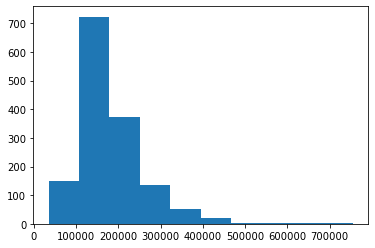

In [491]:
plt.hist(train_df['SalePrice'])

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([15.09093942, 15.53445719, 15.97797496, 16.42149273, 16.8650105 ,
        17.30852827, 17.75204604, 18.19556381, 18.63908158, 19.08259935,
        19.52611712]),
 <BarContainer object of 10 artists>)

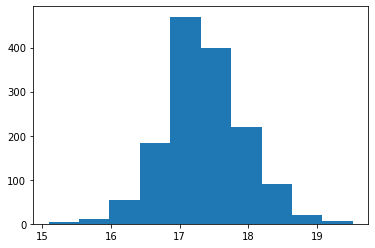

In [492]:
plt.hist(train_df['Log_Sale'])

In [493]:
train_df.isna().sum().sort_values(ascending = True)

SalePrice          0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
                ... 
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
Length: 82, dtype: int64

even without getting the correlation I decided to set all the NAN values to filter table as integer type, because this way it would be easier to analyze with the graphs (categorical)

In [494]:
train_df['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [495]:
train_df['PoolQC'].fillna('Gd', inplace=True)

In [496]:
train_df[['Log_Sale','PoolQC']].groupby('PoolQC', as_index=False).mean().sort_values(by='PoolQC', ascending=False)

,PoolQC,Log_Sale
2,Gd,17.344732
1,Fa,17.698599
0,Ex,18.674591


In [497]:
train_df['MiscFeature'].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [498]:
train_df['MiscFeature'].fillna('Shed', inplace=True)

In [499]:
train_df[['Log_Sale','MiscFeature']].groupby('MiscFeature', as_index=False).mean().sort_values(by='MiscFeature', ascending=False)

,MiscFeature,Log_Sale
3,TenC,17.931569
2,Shed,17.347926
1,Othr,16.384105
0,Gar2,17.372299


In [500]:
train_df['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [501]:
train_df['Alley'].fillna('Grvl', inplace=True)

In [502]:
train_df[['Log_Sale','Alley']].groupby('Alley', as_index=False).mean().sort_values(by='Alley', ascending=False)

,Alley,Log_Sale
1,Pave,17.307741
0,Grvl,17.348174


In [503]:
train_df['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [504]:
train_df['Fence'].fillna('MnPrv', inplace=True)

In [505]:
train_df[['Log_Sale','Fence']].groupby('Fence', as_index=False).mean().sort_values(by='Fence', ascending=False)


,Fence,Log_Sale
3,MnWw,17.019185
2,MnPrv,17.361616
1,GdWo,17.001055
0,GdPrv,17.394736


In [506]:
train_df['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [507]:
train_df['FireplaceQu'].fillna('Gd', inplace=True)

In [508]:
train_df[['Log_Sale','FireplaceQu']].groupby('FireplaceQu', as_index=False).mean().sort_values(by='FireplaceQu', ascending=False)

,FireplaceQu,Log_Sale
4,TA,17.581281
3,Po,16.935533
2,Gd,17.265997
1,Fa,17.324617
0,Ex,18.278973


In [509]:
train_df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [510]:
train_df['Electrical'].fillna('SBrkr', inplace=True)

In [511]:
train_df['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [512]:
train_df['GarageType'].fillna('Attchd', inplace=True)

In [513]:
train_df[['Log_Sale', 'GarageType']].groupby('GarageType', as_index=False).mean().sort_values(by='GarageType', ascending=False)

,GarageType,Log_Sale
5,Detchd,16.974235
4,CarPort,16.717942
3,BuiltIn,17.853234
2,Basment,17.191788
1,Attchd,17.462099
0,2Types,17.166854


In [514]:
train_df.isna().sum().sort_values(ascending = True)

SalePrice         0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
               ... 
GarageYrBlt      81
GarageCond       81
GarageQual       81
GarageFinish     81
LotFrontage     259
Length: 82, dtype: int64

In [515]:
train_df.corr()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id,Log_Sale
SalePrice,1.000000,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,-0.021917,0.948374
MSSubClass,-0.084284,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.011156,-0.073959
LotFrontage,0.351799,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,-0.010601,0.355878
LotArea,0.263843,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,-0.033226,0.257320
OverallQual,0.790982,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,-0.028365,0.817184
OverallCond,-0.077856,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,0.012609,-0.036868
YearBuilt,0.522897,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,-0.012713,0.586570
YearRemodAdd,0.507101,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,-0.021998,0.565608
MasVnrArea,0.477493,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,-0.050298,0.430809
BsmtFinSF1,0.386420,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,-0.005024,0.372023


<AxesSubplot:>

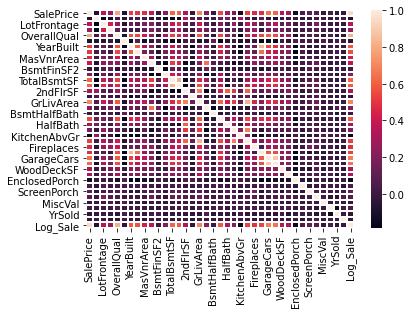

In [516]:
sns.heatmap(train_df.corr(), robust=True, linewidths=True)

Analyzing the Correlation Matrix graphically , we find linear correlations of the target variable with both positive (e.g. Log_Sale and GrLivingArea)
and negative independent variables (e.g. Log and YearBuilt).We also find correlations between the other parameters (e.g. TotRmsAbvGre GrLivingArea).

In [517]:
train_df.drop(columns=['SalePrice', 'MSSubClass', 'LotFrontage', 'MiscVal', 'MoSold', 'YrSold', 'MasVnrArea', 'GarageYrBlt','BsmtFinSF1', 'BsmtFinSF2', 'OpenPorchSF',
                       'EnclosedPorch', 'ScreenPorch', 'OverallCond', '1stFlrSF','2ndFlrSF','GarageCars','PoolArea','LowQualFinSF', '3SsnPorch', 'BsmtHalfBath', 'KitchenAbvGr'], inplace=True)

<AxesSubplot:xlabel='LotArea', ylabel='Log_Sale'>

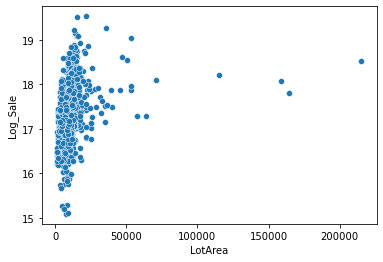

In [518]:
sns.scatterplot(data=train_df, x='LotArea', y='Log_Sale')

<AxesSubplot:xlabel='GarageArea', ylabel='Log_Sale'>

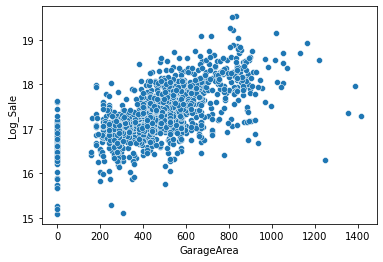

In [519]:
sns.scatterplot(data=train_df, x='GarageArea', y='Log_Sale')

<AxesSubplot:xlabel='GrLivArea', ylabel='Log_Sale'>

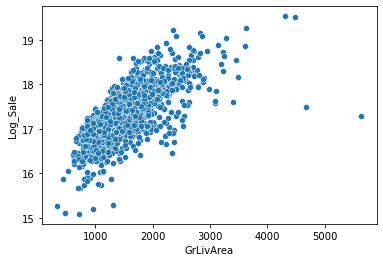

In [520]:
sns.scatterplot(data=train_df, x='GrLivArea', y='Log_Sale')

Analyzing the area graphs we saw that we have some very non-standard values, let's limit the size of the area to a value that makes more sense for our analysis, these values should be for farms and other larger properties

In [521]:
train_df['LotArea'] = train_df.loc[(train_df['LotArea'] < 50000), 'LotArea']

In [522]:
train_df['GarageArea'] = train_df.loc[(train_df['GarageArea'] < 1200), 'GarageArea']

In [523]:
train_df['GrLivArea'] = train_df.loc[(train_df['GrLivArea'] < 4000), 'GrLivArea']

<AxesSubplot:xlabel='LotArea', ylabel='Log_Sale'>

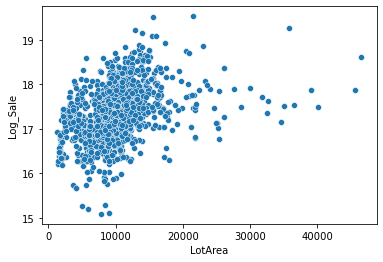

In [524]:
sns.scatterplot(data=train_df, x='LotArea', y='Log_Sale')

<AxesSubplot:xlabel='GarageArea', ylabel='Log_Sale'>

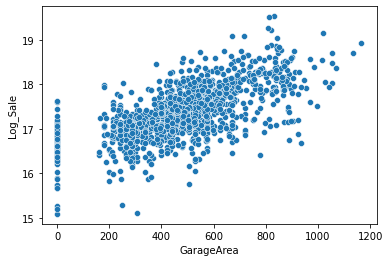

In [525]:
sns.scatterplot(data=train_df, x='GarageArea', y='Log_Sale')

<AxesSubplot:xlabel='GrLivArea', ylabel='Log_Sale'>

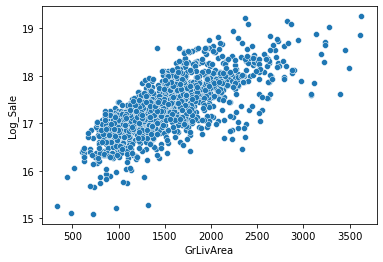

In [526]:
sns.scatterplot(data=train_df, x='GrLivArea', y='Log_Sale')

<AxesSubplot:>

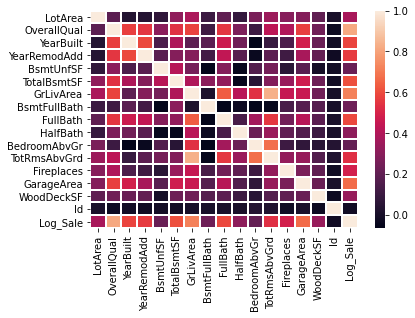

In [527]:
sns.heatmap(train_df.corr(), robust=True, linewidths=True)

In [528]:
train_df['YearBuilt'] = (np.max(train_df['YearBuilt']) - train_df['YearBuilt'])
train_df['YearBuilt'].describe()

count    1460.000000
mean       38.732192
std        30.202904
min         0.000000
25%        10.000000
50%        37.000000
75%        56.000000
max       138.000000
Name: YearBuilt, dtype: float64

In [529]:
train_df['YearRemodAdd'] = (np.max(train_df['YearRemodAdd']) - train_df['YearRemodAdd'])
train_df['YearRemodAdd'].describe()

count    1460.000000
mean       25.134247
std        20.645407
min         0.000000
25%         6.000000
50%        16.000000
75%        43.000000
max        60.000000
Name: YearRemodAdd, dtype: float64

Upon further analysis, we saw that it has properties that are over 100 years old, as well as propeirdades that have never been renovated,

The average age of the residences is 39 years, and the average age of renovation is 34 years.

<h1>Standardizing the model<h1>

In [587]:
train_df.head()

,Log_Sale,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSZoning,SaleBand,LotAreaBand
0,2,1.0,0,1,0,0,0,0,0,0,...,0,Gd,MnPrv,Shed,WD,Normal,1,RL,"(17.31, 17.71]","(7500.0, 9450.0]"
1,2,2.0,0,1,0,0,0,1,0,1,...,298,Gd,MnPrv,Shed,WD,Normal,2,RL,"(17.31, 17.71]","(9450.0, 11500.0]"
2,3,2.0,0,1,1,0,0,0,0,0,...,0,Gd,MnPrv,Shed,WD,Normal,3,RL,"(17.71, 19.53]","(9450.0, 11500.0]"
3,1,2.0,0,1,1,0,0,2,0,2,...,0,Gd,MnPrv,Shed,WD,Abnorml,4,RL,"(16.99, 17.31]","(9450.0, 11500.0]"
4,3,3.0,0,1,1,0,0,1,0,3,...,192,Gd,MnPrv,Shed,WD,Normal,5,RL,"(17.71, 19.53]","(11500.0, 46589.0]"


In [581]:
train_df['Log_Sale'] = train_df['Log_Sale'].round(2)

In [ ]:
train_df['SaleBand'] = pd.qcut(train_df['Log_Sale'], 4)
train_df[['SaleBand', 'Log_Sale']].groupby('SaleBand', as_index=False).mean().sort_values(by='SaleBand', ascending=True)

In [579]:
train_df.loc[(train_df['Log_Sale'] <= 16.99), 'Log_Sale'] = 0
train_df.loc[(train_df['Log_Sale'] > 16.99) & (train_df['Log_Sale'] <= 17.31), 'Log_Sale'] = 1
train_df.loc[(train_df['Log_Sale'] > 17.31) & (train_df['Log_Sale'] <= 17.71), 'Log_Sale'] = 2
train_df.loc[(train_df['Log_Sale'] > 17.71), 'Log_Sale'] = 3

In [ ]:
train_df['LotAreaBand'] = pd.qcut(train_df['LotArea'], 4)
train_df[['LotAreaBand', 'Log_Sale']].groupby('LotAreaBand', as_index=False).mean().sort_values(by='LotAreaBand', ascending=True)

In [586]:
train_df.loc[(train_df['LotArea'] <= 7500.0), 'LotArea'] = 0
train_df.loc[(train_df['LotArea'] > 7500.0) & (train_df['LotArea'] <= 9450.0), 'LotArea'] = 1
train_df.loc[(train_df['LotArea'] > 9450.0) & (train_df['LotArea'] <= 11500.0), 'LotArea'] = 2
train_df.loc[(train_df['LotArea'] > 11500.0), 'LotArea'] = 3

In [ ]:
train_df['Street'].unique()

In [532]:
train_df.loc[(train_df['Street']  == 'Pave'), 'Street'] = 0
train_df.loc[(train_df['Street']  == 'Grvl'), 'Street'] = 1

In [ ]:
train_df['Alley'].unique()

In [534]:
train_df.loc[(train_df['Alley']  == 'Pave'), 'Alley'] = 0
train_df.loc[(train_df['Alley']  == 'Grvl'), 'Alley'] = 1

In [ ]:
train_df['LotShape'].unique()

In [536]:
train_df.loc[(train_df['LotShape']  == 'Reg'), 'LotShape'] = 0
train_df.loc[(train_df['LotShape']  == 'IR1'), 'LotShape'] = 1
train_df.loc[(train_df['LotShape']  == 'IR2'), 'LotShape'] = 2
train_df.loc[(train_df['LotShape']  == 'IR3'), 'LotShape'] = 3

In [ ]:
train_df['LandContour'].unique()

In [538]:
train_df.loc[(train_df['LandContour']  == 'Lvl'), 'LandContour'] = 0
train_df.loc[(train_df['LandContour']  == 'Bnk'), 'LandContour'] = 1
train_df.loc[(train_df['LandContour']  == 'Low'), 'LandContour'] = 2
train_df.loc[(train_df['LandContour']  == 'HLS'), 'LandContour'] = 3

In [ ]:
train_df['Utilities'].unique()

In [540]:
train_df['Utilities'] = pd.get_dummies(train_df['Utilities'], drop_first=True)

In [ ]:
train_df['LotConfig'].unique()

In [542]:
train_df.loc[(train_df['LotConfig']  == 'Inside'), 'LotConfig'] = 0
train_df.loc[(train_df['LotConfig']  == 'FR2'), 'LotConfig'] = 1
train_df.loc[(train_df['LotConfig']  == 'Corner'), 'LotConfig'] = 2
train_df.loc[(train_df['LotConfig']  == 'CulDSac'), 'LotConfig'] = 3
train_df.loc[(train_df['LotConfig']  == 'FR3'), 'LotConfig'] = 4

In [ ]:
train_df['LandSlope'].unique()

In [544]:
train_df.loc[(train_df['LandSlope']  == 'Gtl'), 'LandSlope'] = 0
train_df.loc[(train_df['LandSlope']  == 'Mod'), 'LandSlope'] = 1
train_df.loc[(train_df['LandSlope']  == 'Sev'), 'LandSlope'] = 2

In [ ]:
train_df['Neighborhood'].unique()

In [546]:
train_df.loc[(train_df['Neighborhood']  == 'CollgCr'), 'Neighborhood'] = 0
train_df.loc[(train_df['Neighborhood']  == 'Veenker'), 'Neighborhood'] = 1
train_df.loc[(train_df['Neighborhood']  == 'Crawfor'), 'Neighborhood'] = 2
train_df.loc[(train_df['Neighborhood']  == 'NoRidge'), 'Neighborhood'] = 3
train_df.loc[(train_df['Neighborhood']  == 'Mitchel'), 'Neighborhood'] = 4
train_df.loc[(train_df['Neighborhood']  == 'Somerst'), 'Neighborhood'] = 5
train_df.loc[(train_df['Neighborhood']  == 'NWAmes'), 'Neighborhood'] = 6
train_df.loc[(train_df['Neighborhood']  == 'OldTown'), 'Neighborhood'] = 7
train_df.loc[(train_df['Neighborhood']  == 'BrkSide'), 'Neighborhood'] = 8
train_df.loc[(train_df['Neighborhood']  == 'Sawyer'), 'Neighborhood'] = 9
train_df.loc[(train_df['Neighborhood']  == 'NridgHt'), 'Neighborhood'] = 10

In [ ]:
train_df['Condition1'].unique()

In [548]:
train_df.loc[(train_df['Condition1']  == 'Norm'), 'Condition1'] = 0
train_df.loc[(train_df['Condition1']  == 'Feedr'), 'Condition1'] = 1
train_df.loc[(train_df['Condition1']  == 'PosN'), 'Condition1'] = 2
train_df.loc[(train_df['Condition1']  == 'RRAe'), 'Condition1'] = 3
train_df.loc[(train_df['Condition1']  == 'RRNn'), 'Condition1'] = 4
train_df.loc[(train_df['Condition1']  == 'RRAn'), 'Condition1'] = 5
train_df.loc[(train_df['Condition1']  == 'PosA'), 'Condition1'] = 6
train_df.loc[(train_df['Condition1']  == 'RRNe'), 'Condition1'] = 7
train_df.loc[(train_df['Condition1']  == 'Artery'), 'Condition1'] = 8

In [ ]:
train_df['Condition2'].unique()

In [550]:
train_df.loc[(train_df['Condition2']  == 'Norm'), 'Condition2'] = 0
train_df.loc[(train_df['Condition2']  == 'Artery'), 'Condition2'] = 1
train_df.loc[(train_df['Condition2']  == 'RRNn'), 'Condition2'] = 2
train_df.loc[(train_df['Condition2']  == 'Feedr'), 'Condition2'] = 3
train_df.loc[(train_df['Condition2']  == 'PosN'), 'Condition2'] = 4
train_df.loc[(train_df['Condition2']  == 'PosA'), 'Condition2'] = 5
train_df.loc[(train_df['Condition2']  == 'RRAn'), 'Condition2'] = 6
train_df.loc[(train_df['Condition2']  == 'RRAe'), 'Condition2'] = 7

In [ ]:
train_df['BldgType'].unique()

In [558]:
train_df.loc[(train_df['BldgType']  == '1Fam'), 'BldgType'] = 0
train_df.loc[(train_df['BldgType']  == '2fmCon'), 'BldgType'] = 1
train_df.loc[(train_df['BldgType']  == 'Duplex'), 'BldgType'] = 2
train_df.loc[(train_df['BldgType']  == 'TwnhsE'), 'BldgType'] = 3
train_df.loc[(train_df['BldgType']  == 'Twnhs'), 'BldgType'] = 4

In [ ]:
train_df['HouseStyle'].unique()

In [561]:
train_df.loc[(train_df['HouseStyle']  == '2Story'), 'HouseStyle'] = 0
train_df.loc[(train_df['HouseStyle']  == '1Story'), 'HouseStyle'] = 1
train_df.loc[(train_df['HouseStyle']  == '1.5Fin'), 'HouseStyle'] = 2
train_df.loc[(train_df['HouseStyle']  == '1.5Unf'), 'HouseStyle'] = 3
train_df.loc[(train_df['HouseStyle']  == 'SFoyer'), 'HouseStyle'] = 4
train_df.loc[(train_df['HouseStyle']  == 'SLvl'), 'HouseStyle'] = 5
train_df.loc[(train_df['HouseStyle']  == '2.5Unf'), 'HouseStyle'] = 6
train_df.loc[(train_df['HouseStyle']  == '2.5Fin'), 'HouseStyle'] = 7

In [594]:
train_df.head()

,Log_Sale,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSZoning,SaleBand,LotAreaBand,OverBand
0,2,1.0,0,1,0,0,0,0,0,0,...,Gd,MnPrv,Shed,WD,Normal,1,RL,"(17.31, 17.71]","(7500.0, 9450.0]","(6.0, 7.0]"
1,2,2.0,0,1,0,0,0,1,0,1,...,Gd,MnPrv,Shed,WD,Normal,2,RL,"(17.31, 17.71]","(9450.0, 11500.0]","(5.0, 6.0]"
2,3,2.0,0,1,1,0,0,0,0,0,...,Gd,MnPrv,Shed,WD,Normal,3,RL,"(17.71, 19.53]","(9450.0, 11500.0]","(6.0, 7.0]"
3,1,2.0,0,1,1,0,0,2,0,2,...,Gd,MnPrv,Shed,WD,Abnorml,4,RL,"(16.99, 17.31]","(9450.0, 11500.0]","(6.0, 7.0]"
4,3,3.0,0,1,1,0,0,1,0,3,...,Gd,MnPrv,Shed,WD,Normal,5,RL,"(17.71, 19.53]","(11500.0, 46589.0]","(7.0, 10.0]"


In [ ]:
train_df['OverBand'] = pd.qcut(train_df['OverallQual'], 4)
train_df[['OverBand', 'Log_Sale']].groupby('OverBand', as_index=False).mean().sort_values(by='OverBand', ascending=True)

In [593]:
train_df.loc[(train_df['OverallQual'] <= 5.0), 'OverallQual'] = 0
train_df.loc[(train_df['OverallQual'] > 5.0) & (train_df['OverallQual'] <= 6.0), 'OverallQual'] = 1
train_df.loc[(train_df['OverallQual'] > 6.0) & (train_df['OverallQual'] <= 7.0), 'OverallQual'] = 2
train_df.loc[(train_df['OverallQual'] > 7.0), 'OverallQual'] = 3

<h1> Creating the Model</h1>

There are many libraries for making models, I try to use some of the best known ones to make the best decision, as here I always try to improve my knowledge, here are the ones I will use in this challenge

I will rearrange the columns to make our target variable stand out

In [551]:
print(train_df.columns)

Index(['MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'Id', 'Log_Sale'],
      dtype='object')


In [552]:
train_df = train_df[['Log_Sale', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
                     'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
                     'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                     'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
                     'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                     'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                     'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
                     'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
                     'GarageCond', 'PavedDrive', 'WoodDeckSF', 'PoolQC', 'Fence',
                     'MiscFeature', 'SaleType', 'SaleCondition', 'Id', 'MSZoning']]

train_df.head()

,Log_Sale,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSZoning
0,17.669688,8450.0,0,1,0,0,0,0,0,0,...,TA,Y,0,Gd,MnPrv,Shed,WD,Normal,1,RL
1,17.469610,9600.0,0,1,0,0,0,1,0,1,...,TA,Y,298,Gd,MnPrv,Shed,WD,Normal,2,RL
2,17.769915,11250.0,0,1,1,0,0,0,0,0,...,TA,Y,0,Gd,MnPrv,Shed,WD,Normal,3,RL
3,17.095067,9550.0,0,1,1,0,0,2,0,2,...,TA,Y,0,Gd,MnPrv,Shed,WD,Abnorml,4,RL
4,17.931569,14260.0,0,1,1,0,0,1,0,3,...,TA,Y,192,Gd,MnPrv,Shed,WD,Normal,5,RL


In [553]:
Xtrain = train_df.drop(columns='Log_Sale')
Ytrain = train_df['Log_Sale']

Now we divide it into training and test sets (test with 20% - 80/20, following the Pareto Principle)

In [554]:
x_train, x_test, y_train, y_test = train_test_split(Xtrain,Ytrain, test_size= 0.2, random_state=42)

In [555]:
#Linear Regression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train,y_train) * 100, 2)
acc_log

ValueError: could not convert string to float: 'NAmes'